In [4]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import random 
import time
from matplotlib.animation import FuncAnimation

n=2
fs = 'xx-large'


In [5]:
def area(x,y):
    return np.abs(0.5*(x[0]*(y[1]-y[2]) + x[1]*(y[2]-y[0])+ x[2]*(y[0]-y[1])))

def stima_pi_triangoli_in(max_iter):
    X = [0,np.sqrt(3)/2,-np.sqrt(3)/2]
    Y = [1,-0.5,-0.5]
    A1 = area(X,Y)
    
    for i in range(max_iter):
        points = len(X)
        tmpX = []
        tmpY = []
        newX = []
        newY = []
        for j in range(points):
            xm = 0.5 * (X[j] + X[j-1])
            ym = 0.5 * (Y[j] + Y[j-1])
            mod = np.sqrt(xm*xm + ym*ym)
            tmpX.append(xm/mod)
            tmpY.append(ym/mod)
        A1 += area(tmpX,tmpY)
        for j in range(2*points):
            if(j%2 == 0):
                idx = int(j/2)
                newX.append(tmpX[idx])
                newY.append(tmpY[idx])
            else:
                idx = int((j+1)/2)-1
                newX.append(X[idx])
                newY.append(Y[idx])
        X = newX
        Y = newY
    print("stima pi = {}".format(A1))
    return A1, X, Y

def stima_pi_montecarlo(points):
    points = int(points)
    x=np.zeros(points)
    y=np.zeros(points)

    circle = 0
    for i in range(points):
        x[i] = random.uniform(0,1)
        y[i] = random.uniform(0,1)
        if (x[i]**2 + y[i]**2 <= 1):
            circle +=1
        
    pi = 4*circle/points
    print("stima pi = {}".format(pi))
    return pi, x, y

In [6]:
piT, X, Y = stima_pi_triangoli_in(6)
piM, x, y = stima_pi_montecarlo(1e6)

stima pi = 3.1081519592447457
stima pi = 3.140564


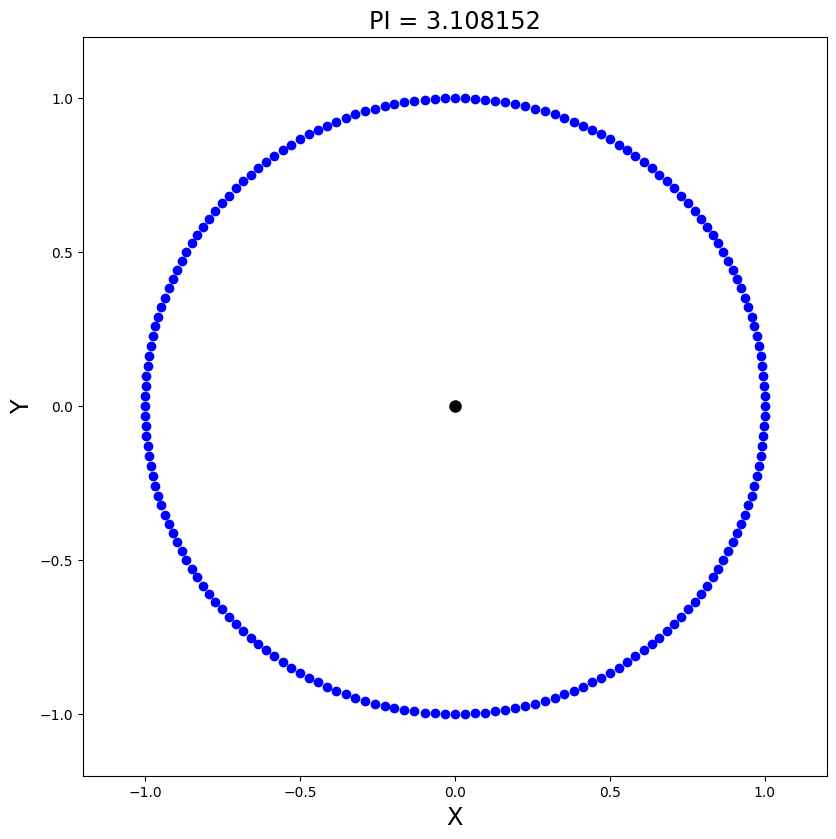

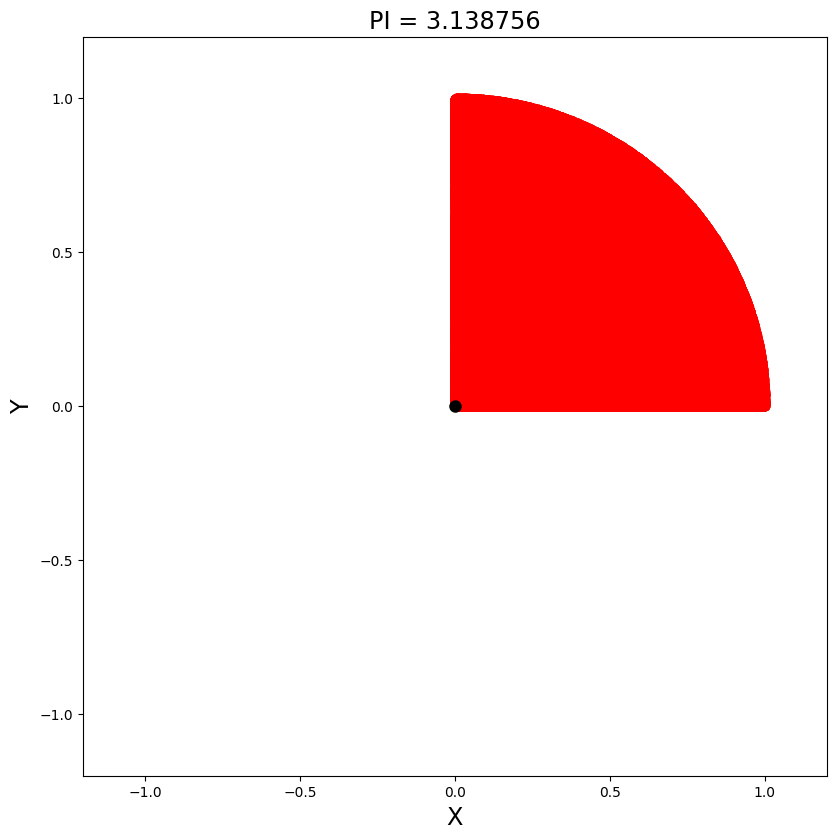

In [35]:
fig = plt.figure(0, figsize=[n*4.8,n*4.8])
_ = plt.scatter(X,Y, lw=1, color='blue',)
_ = plt.scatter(0,0, color='black', marker='o',lw=3)
_ = plt.xlabel('X', fontsize=fs)
_ = plt.ylabel('Y', fontsize=fs)
_ = plt.title('PI = %f'%piT,fontsize=fs)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)

fig2 = plt.figure(2, figsize=[n*4.8,n*4.8])
# _ = plt.scatter(x[~inside],y[~inside],color='blue')
_ = plt.scatter(x[x**2 + y**2 <= 1],y[x**2 + y**2 <= 1],color='red')
_ = plt.scatter(0,0, color='black', marker='o',lw=3)
_ = plt.xlabel('X', fontsize=fs)
_ = plt.ylabel('Y', fontsize=fs)
_ = plt.title('PI = %f'%piM,fontsize=fs)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)

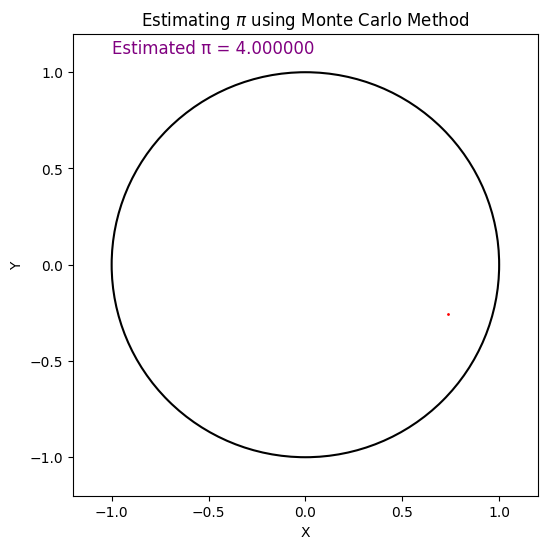

In [ ]:
# Try with class instead
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import random 
import time
from IPython.display import display, clear_output

class MonteCarloPiEstimator:
    def __init__(self, points):
        self.points = int(points)
        self.x = np.zeros(self.points)
        self.y = np.zeros(self.points)
        self.circle_points = 0
        self.pi_estimate = 0
        self.inside_x = []
        self.inside_y = []
        self.outside_x = []
        self.outside_y = []
        
        # Set up the figure and axis
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.ax.set_xlim(-1.2, 1.2)
        self.ax.set_ylim(-1.2, 1.2)
        self.ax.set_xlabel("X")
        self.ax.set_ylabel("Y")
        self.ax.set_title(r"Estimating $\pi$ using Monte Carlo Method")
        
        # Set up the scatter plots
        self.inside_plot, = self.ax.plot([], [], 'ro', markersize=1, label='Inside Circle')
        self.outside_plot, = self.ax.plot([], [], 'bo', markersize=1, label='Outside Circle')
        
        # Draw a circle for reference
        circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=1.5)
        self.ax.add_patch(circle)
        
        # Display the estimated pi value as text
        self.pi_text = self.ax.text(-1, 1.1, '', fontsize=12, color='purple')
        
    def run_simulation(self):
        for i in range(self.points):
            # Generate a random point
            x = random.uniform(-1, 1)
            y = random.uniform(-1, 1)
            
            # Check if the point is inside the circle
            if x**2 + y**2 <= 1:
                self.circle_points += 1
                self.inside_x.append(x)
                self.inside_y.append(y)
            else:
                self.outside_x.append(x)
                self.outside_y.append(y)
            
            # Update the π estimate
            pi_estimate = 4 * self.circle_points / (i + 1)
            
            # Update the scatter plot data
            self.inside_plot.set_data(self.inside_x, self.inside_y)
            self.outside_plot.set_data(self.outside_x, self.outside_y)
            
            # Update the π estimate display
            self.pi_text.set_text(f"Estimated π = {pi_estimate:.6f}")

            # Clear the previous output and display the updated plot
            # clear_output(wait=True)  # Clears the previous output to update the plot
            # display(self.fig)  # Display the updated plot
            # Explicitly draw the updated plot
            self.fig.canvas.draw()
            self.fig.canvas.flush_events() 
            plt.pause(0.01)
            
        plt.ioff()
        plt.show()

# Example usage
estimator = MonteCarloPiEstimator(1000)
estimator.run_simulation()
